In [11]:
from keras.datasets import  boston_housing
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [12]:
(train_data ,train_targets),(test_data, test_targets) = boston_housing.load_data()

In [13]:
print(len(train_data))
print(train_data.shape)
print(train_data[0])

404
(404, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [14]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

print(train_data[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [25]:
def build_moudel():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model



In [26]:
print(train_data[0].shape)
print(train_data.shape[1])
l = [1,2,3,4,5,6,7,8,9,]
a = l[:0]
print(a)
print(l)

(13,)
13
[]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [27]:
k = 4
num_val_samples = len(train_data) // k
print(num_val_samples)
num_epochs = 500
all_scores = []
all_mae_histories = []
for i in range(k):
    print('processing fold -->>', i)
    val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
                                        [train_data[:i* num_val_samples],
                                         train_data[(i+1)*num_val_samples:]],
                                        axis =0)
    partial_train_targets = np.concatenate(
                                        [train_targets[:i*num_val_samples],
                                        train_targets[(i+1)*num_val_samples:]],
                                        axis = 0)
    print(type(partial_train_data))
    print(partial_train_data.shape)
    print(partial_train_targets.shape)
    model = build_moudel()
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data,val_targets),
             epochs=num_epochs, batch_size=10,verbose=0)
    
#     val_mse, val_mea = model.evaluate(val_data,val_targets,verbose=0)
#     all_scores.append(val_mea)
    mea_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mea_history)


101
processing fold -->> 0
<class 'numpy.ndarray'>
(303, 13)
(303,)
processing fold -->> 1
<class 'numpy.ndarray'>
(303, 13)
(303,)
processing fold -->> 2
<class 'numpy.ndarray'>
(303, 13)
(303,)
processing fold -->> 3
<class 'numpy.ndarray'>
(303, 13)
(303,)


In [32]:
print(len(all_mae_histories))
print(len(all_mae_histories[0]))
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

print(type(average_mae_history))
print(len(average_mae_history))

4
500
<class 'list'>
500


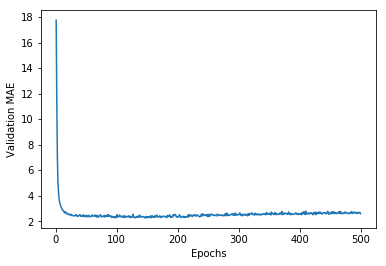

In [29]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()
